<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>

<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">به منظور استخراج دیتاست، ابتدا تمامی فیلم‌های موجود در صفحه اصلی ژانر‌های مختلف سایت فیلیمو استخراج شده است. سپس تمامی کامنت‌های موجود برای هرکدام از فیلم‌ها استخراج شده است. در نهايت با بررسی این کامنت‌ها، فقط کامنت‌هایی به عنوان داده مورد استفاده قرار گرفته است که دارای حداقل یک ایموجی باشند.</div>
<br>
<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">در نتیجه توضیحات کلی دیتاست عبارت است از:</div>
<ul style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">
    <li>توضیح: کامنت‌های فیلم‌های سایت فیلیمو</li>
    <li>حجم دیتاست: 8k کامنت دارای ایموجی</li>
    <li>زبان دیتاست: فارسی</li>
</ul>

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa
!pip install nltk

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random
import codecs
from nltk import FreqDist
import nltk
import itertools
import copy

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">زمانی که از <code>google-colab</code> استفاده می‌شود باید دو مورد زیر اضافه شود:</div>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# os.chdir('/content/drive/MyDrive/NLP/hw1/nlp/hw1/code/')

<div style="direction:rtl; font-family: 'B Lotus';  ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;"">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://unicode.org/Public/emoji/15.0/" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [2]:
persian_alphabet = ["آ","ا","أ","ئ","ب","پ","ت","ث","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","گ","ل","م","ن","و","ه","ی"]
decorative_signs = [" ", ",", ":", "؛", "|", "\\", "*", "\u200C", "٬", "!", "؟", "?", "(", ")", ".", "،", "%", "٪", "ـ", "-", "+", "=", "`", "~", "ء", "ٔ", "ٓ", "«", "»", "ة", "]", "[", "ة", "{", "}"]
english_alphabet = [chr(i) for i in range(ord('A'), ord('Z')+1)]
english_alphabet.extend([chr(i) for i in range(ord('a'), ord('z')+1)])
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [3]:
emoji_df = pd.read_csv('./../data/emoji_df.csv')

emoji_df_single = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])
emoji_df_multiple = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])

j = 0
k = 0
for i, code in enumerate(emoji_df['codepoints']):
    if len(code.split()) > 1:
        emoji_df_multiple.loc[j] = emoji_df.loc[i]
        j += 1
    else:
        emoji_df_single.loc[k] = emoji_df.loc[i]
        k += 1

emoji_df

emoji                             name              group  \
0           😀                    grinning face  Smileys & Emotion   
1           😃      grinning face with big eyes  Smileys & Emotion   
2           😄  grinning face with smiling eyes  Smileys & Emotion   
3           😁   beaming face with smiling eyes  Smileys & Emotion   
4           😆          grinning squinting face  Smileys & Emotion   
...       ...                              ...                ...   
4576       🇿🇲                     flag: Zambia              Flags   
4577       🇿🇼                   flag: Zimbabwe              Flags   
4578  🏴󠁧󠁢󠁥󠁮󠁧󠁿                    flag: England              Flags   
4579  🏴󠁧󠁢󠁳󠁣󠁴󠁿                   flag: Scotland              Flags   
4580  🏴󠁧󠁢󠁷󠁬󠁳󠁿                      flag: Wales              Flags   

             sub_group                                 codepoints  
0         face-smiling                                      1F600  
1         face-smiling                                      1F603  
2         face-smiling                                      1F604  
3         face-smiling                                      1F601  
4         face-smiling                                      1F606  
...                ...                                        ...  
4576      country-flag                                1F1FF 1F1F2  
4577      country-flag                                1F1FF 1F1FC  
4578  subdivision-flag  1F3F4 E0067 E0062 E0065 E006E E0067 E007F  
4579  subdivision-flag  1F3F4 E0067 E0062 E0073 E0063 E0074 E007F  
4580  subdivision-flag  1F3F4 E0067 E0062 E0077 E006C E0073 E007F  

[4581 rows x 5 columns]

In [4]:
emoji_df_multiple

emoji                   name              group  \
0          ☺️           smiling face  Smileys & Emotion   
1        😶‍🌫️         face in clouds  Smileys & Emotion   
2         😶‍🌫         face in clouds  Smileys & Emotion   
3         😮‍💨          face exhaling  Smileys & Emotion   
4         😵‍💫  face with spiral eyes  Smileys & Emotion   
...       ...                    ...                ...   
3256       🇿🇲           flag: Zambia              Flags   
3257       🇿🇼         flag: Zimbabwe              Flags   
3258  🏴󠁧󠁢󠁥󠁮󠁧󠁿          flag: England              Flags   
3259  🏴󠁧󠁢󠁳󠁣󠁴󠁿         flag: Scotland              Flags   
3260  🏴󠁧󠁢󠁷󠁬󠁳󠁿            flag: Wales              Flags   

                   sub_group                                 codepoints  
0             face-affection                                  263A FE0F  
1     face-neutral-skeptical                      1F636 200D 1F32B FE0F  
2     face-neutral-skeptical                           1F636 200D 1F32B  
3     face-neutral-skeptical                           1F62E 200D 1F4A8  
4                face-unwell                           1F635 200D 1F4AB  
...                      ...                                        ...  
3256            country-flag                                1F1FF 1F1F2  
3257            country-flag                                1F1FF 1F1FC  
3258        subdivision-flag  1F3F4 E0067 E0062 E0065 E006E E0067 E007F  
3259        subdivision-flag  1F3F4 E0067 E0062 E0073 E0063 E0074 E007F  
3260        subdivision-flag  1F3F4 E0067 E0062 E0077 E006C E0073 E007F  

[3261 rows x 5 columns]

In [5]:
emoji_group_counts = emoji_df_single['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_single[emoji_df_single['group'] == c]['emoji'])}")

Objects:['👓', '🕶', '🥽', '🥼', '🦺', '👔', '👕', '👖', '🧣', '🧤', '🧥', '🧦', '👗', '👘', '🥻', '🩱', '🩲', '🩳', '👙', '👚', '👛', '👜', '👝', '🛍', '🎒', '🩴', '👞', '👟', '🥾', '🥿', '👠', '👡', '🩰', '👢', '👑', '👒', '🎩', '🎓', '🧢', '🪖', '⛑', '📿', '💄', '💍', '💎', '🔇', '🔈', '🔉', '🔊', '📢', '📣', '📯', '🔔', '🔕', '🎼', '🎵', '🎶', '🎙', '🎚', '🎛', '🎤', '🎧', '📻', '🎷', '🪗', '🎸', '🎹', '🎺', '🎻', '🪕', '🥁', '🪘', '📱', '📲', '☎', '📞', '📟', '📠', '🔋', '🔌', '💻', '🖥', '🖨', '⌨', '🖱', '🖲', '💽', '💾', '💿', '📀', '🧮', '🎥', '🎞', '📽', '🎬', '📺', '📷', '📸', '📹', '📼', '🔍', '🔎', '🕯', '💡', '🔦', '🏮', '🪔', '📔', '📕', '📖', '📗', '📘', '📙', '📚', '📓', '📒', '📃', '📜', '📄', '📰', '🗞', '📑', '🔖', '🏷', '💰', '🪙', '💴', '💵', '💶', '💷', '💸', '💳', '🧾', '💹', '✉', '📧', '📨', '📩', '📤', '📥', '📦', '📫', '📪', '📬', '📭', '📮', '🗳', '✏', '✒', '🖋', '🖊', '🖌', '🖍', '📝', '💼', '📁', '📂', '🗂', '📅', '📆', '🗒', '🗓', '📇', '📈', '📉', '📊', '📋', '📌', '📍', '📎', '🖇', '📏', '📐', '✂', '🗃', '🗄', '🗑', '🔒', '🔓', '🔏', '🔐', '🔑', '🗝', '🔨', '🪓', '⛏', '⚒', '🛠', '🗡', '⚔', '🔫', '🪃', '🏹', '🛡', '🪚', '🔧', '🪛', '🔩', '

In [6]:
emoji_group_counts = emoji_df_multiple['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_multiple[emoji_df_multiple['group'] == c]['emoji'])}")
    print('=======')

People & Body:['👋🏻', '👋🏼', '👋🏽', '👋🏾', '👋🏿', '🤚🏻', '🤚🏼', '🤚🏽', '🤚🏾', '🤚🏿', '🖐️', '🖐🏻', '🖐🏼', '🖐🏽', '🖐🏾', '🖐🏿', '✋🏻', '✋🏼', '✋🏽', '✋🏾', '✋🏿', '🖖🏻', '🖖🏼', '🖖🏽', '🖖🏾', '🖖🏿', '👌🏻', '👌🏼', '👌🏽', '👌🏾', '👌🏿', '🤌🏻', '🤌🏼', '🤌🏽', '🤌🏾', '🤌🏿', '🤏🏻', '🤏🏼', '🤏🏽', '🤏🏾', '🤏🏿', '✌️', '✌🏻', '✌🏼', '✌🏽', '✌🏾', '✌🏿', '🤞🏻', '🤞🏼', '🤞🏽', '🤞🏾', '🤞🏿', '🤟🏻', '🤟🏼', '🤟🏽', '🤟🏾', '🤟🏿', '🤘🏻', '🤘🏼', '🤘🏽', '🤘🏾', '🤘🏿', '🤙🏻', '🤙🏼', '🤙🏽', '🤙🏾', '🤙🏿', '👈🏻', '👈🏼', '👈🏽', '👈🏾', '👈🏿', '👉🏻', '👉🏼', '👉🏽', '👉🏾', '👉🏿', '👆🏻', '👆🏼', '👆🏽', '👆🏾', '👆🏿', '🖕🏻', '🖕🏼', '🖕🏽', '🖕🏾', '🖕🏿', '👇🏻', '👇🏼', '👇🏽', '👇🏾', '👇🏿', '☝️', '☝🏻', '☝🏼', '☝🏽', '☝🏾', '☝🏿', '👍🏻', '👍🏼', '👍🏽', '👍🏾', '👍🏿', '👎🏻', '👎🏼', '👎🏽', '👎🏾', '👎🏿', '✊🏻', '✊🏼', '✊🏽', '✊🏾', '✊🏿', '👊🏻', '👊🏼', '👊🏽', '👊🏾', '👊🏿', '🤛🏻', '🤛🏼', '🤛🏽', '🤛🏾', '🤛🏿', '🤜🏻', '🤜🏼', '🤜🏽', '🤜🏾', '🤜🏿', '👏🏻', '👏🏼', '👏🏽', '👏🏾', '👏🏿', '🙌🏻', '🙌🏼', '🙌🏽', '🙌🏾', '🙌🏿', '👐🏻', '👐🏼', '👐🏽', '👐🏾', '👐🏿', '🤲🏻', '🤲🏼', '🤲🏽', '🤲🏾', '🤲🏿', '🙏🏻', '🙏🏼', '🙏🏽', '🙏🏾', '🙏🏿', '✍️', '✍🏻', '✍🏼', '✍🏽', '✍🏾', '✍🏿', '💅🏻', '💅🏼', '💅🏽', '💅🏾', '💅🏿', '

In [7]:
selected_group_df = ['People & Body', 'Smileys & Emotion', 'Symbols', 'Travel & Places']
emoji_selected_df = pd.DataFrame()
for group in selected_group_df:
    emoji_selected_df = pd.concat([emoji_selected_df, 
                                   emoji_df_single[emoji_df_single['group'] == group]], 
                                  ignore_index=True)

emoji_selected_df

emoji                       name            group          sub_group  \
0       👋                waving hand    People & Body  hand-fingers-open   
1       🤚        raised back of hand    People & Body  hand-fingers-open   
2       🖐  hand with fingers splayed    People & Body  hand-fingers-open   
3       ✋                raised hand    People & Body  hand-fingers-open   
4       🖖              vulcan salute    People & Body  hand-fingers-open   
..    ...                        ...              ...                ...   
710     ⛄       snowman without snow  Travel & Places      sky & weather   
711     ☄                      comet  Travel & Places      sky & weather   
712     🔥                       fire  Travel & Places      sky & weather   
713     💧                    droplet  Travel & Places      sky & weather   
714     🌊                 water wave  Travel & Places      sky & weather   

    codepoints  
0        1F44B  
1        1F91A  
2        1F590  
3         270B  
4        1F596  
..         ...  
710       26C4  
711       2604  
712      1F525  
713      1F4A7  
714      1F30A  

[715 rows x 5 columns]

In [8]:
emoji_alphabet_single = list(emoji_df_single['emoji'])
emoji_alphabet_multiple = list(emoji_df_multiple['emoji'])
emoji_alphabet = list(emoji_df['emoji'])
print('# Selected emoji list: \t\t\t\t', len(emoji_selected_df))
print('# Single Unicode Alphabet emoji list: \t\t', len(emoji_alphabet_single))
print('# Multiple Unicode Alphabet emoji list: \t', len(emoji_alphabet_multiple))
print('# All emoji list: \t\t\t\t', len(emoji_alphabet))

# Selected emoji list: 				 715
# Single Unicode Alphabet emoji list: 		 1320
# Multiple Unicode Alphabet emoji list: 	 3261
# All emoji list: 				 4581


In [9]:
emoji_alphabet = list(emoji_selected_df['emoji'])

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [10]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [126]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [130]:
def get_comments_with_emoji(data):
    comments = []
    s1 = set(emoji_alphabet_multiple)
    
    for d in tqdm(data):
        if type(d[2]) == str:
            for e in emoji_alphabet:
                if e in d[2]:
                    comments.append(d)
                    break
    return comments

In [131]:
get_comments_with_emoji([['drama', 'title', 'Hello 👍🏻'], ['drama', 'title', 'hi 👍🏻😒']])

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 16288.56it/s]


[['drama', 'title', 'Hello 👍🏻'], ['drama', 'title', 'hi 👍🏻😒']]

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [132]:
# comments_with_emoji = get_comments_with_emoji(data)

# f = open("./../result/comments_with_emoji.txt", "w")
# for comment in comments_with_emoji:
#     f.write(f"{comment[0]}\t{comment[1]}\t{comment[2]}\n")
# f.close()

# len(comments_with_emoji)

100%|████████████████████████████████████████████████████████████████████████| 708934/708934 [00:10<00:00, 66047.71it/s]


88761

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">با توجه به این که پروسه استخراج کامنت‌های دارای ایموجی، کمی طولانی است، خروجی در فایل <code>comments_with_emoji.txt</code> ذخیره شده و هر موقع نیاز باشد، بازخوانی می‌شود. </div>

In [11]:
comments_with_emoji = []

f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()

comments_with_emoji = [row.replace('\n', '').split('\t') for row in comments_with_emoji]

comments_df = pd.DataFrame(comments_with_emoji, columns=['genre', 'title', 'comment'])
comments_df

genre                                              title  \
0        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
1        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
2        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
3        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
4        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
...        ...                                                ...   
88756  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
88757  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
88758  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
88759  theatre  فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...   
88760  theatre  فیلم نقصد|دانلود و تماشای آنلاین با بالاترین ک...   

                                                 comment  
0      توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را...  
1                                        ارزش دیدن داره👌  
2                                              پسندیدم 👍  
3      عااااااااالی بود . با بازی آقای درخشانی عزیز  ...  
4                                         خیلی خوب بود👌👌  
...                                                  ...  
88756  واقعا دلم سوخت که چرا اون سال این تئاتر زیبا ر...  
88757                   واقعا عالی بود، جذاب و بی نظیر 👍  
88758                                                😍😍😍  
88759  عالی 😍😍 با بازی بی نظیر و مرکعه پانته آ پناهی ...  
88760    خیلی داستان جالبی داره..پیشنهاد میکنم ببینین😃👌🏻  

[88761 rows x 3 columns]

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [12]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع نمایش چند مورد اول لیست</div>

In [13]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [13]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in tqdm(comments_df['comment']):
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

100%|███████████████████████████████████████████████████████████████████████████| 88761/88761 [00:13<00:00, 6386.11it/s]


In [14]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17335
 1	❤	14646
 2	👌	12692
 3	👍	9942
 4	😂	6895
 5	😘	4838
 6	👏	4400
 7	🤩	3413
 8	🤣	3017
 9	🥰	2950
10	😭	2334
11	😊	2122
12	🙏	2095
13	💜	1872
14	💙	1769
15	😁	1599
16	💖	1547
17	🥺	1436
18	😅	1119
19	😐	1118
---------------------
The percentage of emojis in the text compared to the total emojis: [63.07%]


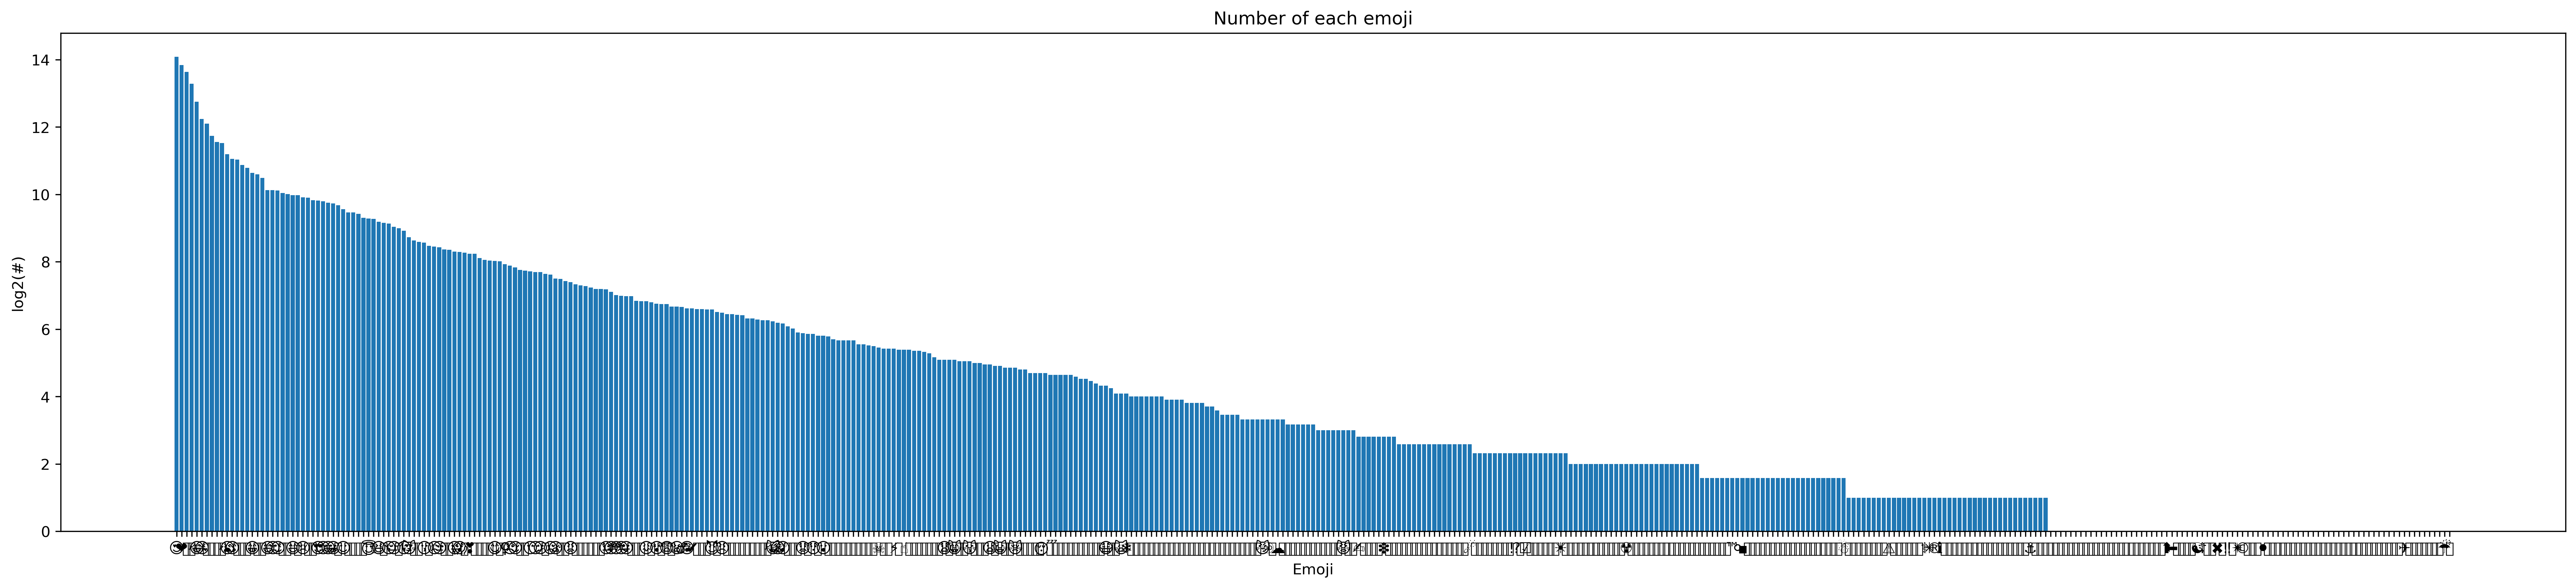

In [16]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "B Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
    <li>تابع <code>convert_to_basic_emoji</code> برخی از ایموجی‌ها که رنگ‌های مخلتف یا ساختارهای مختلف مبتنی بر یک پایه هستند را به حالت پایه تبدیل می‌کند</li>
    <li>تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن را شمارش کرده و درصورتی که اختلاف تعداد آن‌ها با تعداد کاراکتر‌های غیر ایموجی متن بیش از <code>threshold</code> مشخصی باشد، از آن <code>threshold</code> به بعد، اجازه درج ایموجی را نمی‌دهد.</li>
    <li>تابع <code>replace_with_persian</code> برخی از کاراکترهایی که مشابه فارسی هستند ولی در الفبای فارسی نیستند را به مشابه فارسی آن‌ها تبدیل می‌کند.</li>
    <li>تابع <code>my_normalizer</code> ابتدا خود تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را صدا می کند و خروجی آن را گرفته و تغییرات لازم را متناسب با دیکشنری ای که توسط تابع <code>aug_data_init</code> مقدار دهی شده است را اعمال می&zwnj;کند تا این خطاها نیز رفع شود.</li>
</ul>

In [14]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, english_alphabet, decorative_signs, 
                 persian_numbers, english_numbers, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.decorative_signs = decorative_signs
        self.english_alphabet = english_alphabet
        self.persian_numbers = persian_numbers
        self.english_numbers = english_numbers
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.emoji_alphabet and sent[i+1] != ' ') or \
                    (sent[i] != ' ' and sent[i+1] in self.emoji_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
    
    
    def convert_to_basic_emoji(self, sent):
        res_sent = ''
        for c in sent:
            if c in self.persian_alphabet or \
            c in self.decorative_signs or \
            c in self.english_alphabet or \
            c in self.persian_numbers or \
            c in self.english_numbers or \
            c in self.emoji_alphabet :
                res_sent += c
        return res_sent

    
#     def normalize_emoji_len(self, text, threshold=300):
#         emoji_num = 0
#         persian_num = 0
#         for t in text:
#             if t not in self.persian_alphabet:
#                 emoji_num += 1
#             elif t in self.persian_alphabet:
#                 persian_num += 1
#         res_text = ''
#         if emoji_num > persian_num + threshold:
#             j = 0
#             for i, t in enumerate(text):
#                 if t not in self.persian_alphabet:
#                     j += 1
#                 if (j < persian_num + threshold and t in self.persian_alphabet) or (not (t in self.persian_alphabet)):
#                     res_text += t
                
#         else:
#             res_text = text
        
#         return res_text
    
    
    def normalize_emoji(self, text):
        res_text = ''
        for t in text:
            if t in self.emoji_alphabet and not t in res_text:
                res_text += t
            elif not t in self.emoji_alphabet:
                res_text += t
        return res_text
    
    
    def replace_with_persian(self, sent):
        replace_list = {'ى':'ی',
                        'ة':'ه',
                        'ي':'ی'}
        
        for x in replace_list:
            sent = sent.replace(x, replace_list[x])
        
        return sent
    
    
    def my_normalizer(self, text):
        text = self.replace_with_persian(text)
        text = self.add_space_between_emoji_and_text(text)
        text = self.normalize_emoji(text)
        text = self.normalize(text)
        text = self.convert_to_basic_emoji(text)
        
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [15]:
normalizer = MyNormalizer(persian_alphabet, 
                          english_alphabet, 
                          decorative_signs, 
                          persian_numbers, 
                          english_numbers, 
                          emoji_alphabet
                          )

In [16]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏', 'فوق العاده']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گرم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳 👏
7	Before: فوق العاده		After: فوق العاده


<div style='direction:rtl;font-family: "B Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [17]:
comments = []
for row in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in row[2]:
            comments.append([row[0], row[1], row[2].replace("&#039;", "\'").replace('\n', '').strip().split()])
            break

comments_df = pd.DataFrame(comments, columns=['genre', 'title', 'comment'])
comments_df

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 88761/88761 [00:00<00:00, 433797.46it/s]


genre                                              title  \
0        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
1        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
2        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
3        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
4        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
...        ...                                                ...   
84315  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84316  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84317  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84318  theatre  فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...   
84319  theatre  فیلم نقصد|دانلود و تماشای آنلاین با بالاترین ک...   

                                                 comment  
0      [توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم, ...  
1                                    [ارزش, دیدن, داره👌]  
2                                           [پسندیدم, 👍]  
3      [عااااااااالی, بود, ., با, بازی, آقای, درخشانی...  
4                                     [خیلی, خوب, بود👌👌]  
...                                                  ...  
84315                             [عالی, و, بی‌نقص, 👌🏿💙]  
84316  [واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئا...  
84317          [واقعا, عالی, بود،, جذاب, و, بی, نظیر, 👍]  
84318  [عالی, 😍😍, با, بازی, بی, نظیر, و, مرکعه, پانته...  
84319  [خیلی, داستان, جالبی, داره..پیشنهاد, میکنم, بب...  

[84320 rows x 3 columns]

<div style='direction:rtl;font-family: "B Lotus";'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می شود که شامل بخش‌های زیر می‌باشد:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>اجرای تابع <code>normalizer</code> کتابخانه <code>hazm</code></li>
  <li>با استفاده از تابع <code>add_space_between_emoji_and_text</code> در مواردی که بین متن و ایموجی فاصله‌ای وجود ندارد، فاصله ایجاد می کند.</li>
    <li>با استفاده از تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن نرمالایز می‌شود.</li>
  <li>بعضی از اشتباهات یا حالت‌هایی که در متن به صورت محاوره‌ای استفاده می‌شود، اصلاح می‌شود.</li>
</ul>  

In [18]:
comments_normalized = {}
comments_normalized['genre'] = comments_df['genre']
comments_normalized['title'] = comments_df['title']
comments_normalized['comment'] = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments_df['comment'])]
comments_normalized = pd.DataFrame(comments_normalized)
comments_normalized

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 84320/84320 [00:59<00:00, 1421.98it/s]


genre                                              title  \
0        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
1        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
2        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
3        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
4        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
...        ...                                                ...   
84315  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84316  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84317  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84318  theatre  فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...   
84319  theatre  فیلم نقصد|دانلود و تماشای آنلاین با بالاترین ک...   

                                                 comment  
0      [توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم, ...  
1                                   [ارزش, دیدن, داره 👌]  
2                                           [پسندیدم, 👍]  
3      [عالی, بود, ., با, بازی, آقای, درخشانی, عزیز, ...  
4                                    [خیلی, خوب, بود 👌 ]  
...                                                  ...  
84315                            [عالی, و, بی‌نقص, 👌  💙]  
84316  [واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئا...  
84317          [واقعا, عالی, بود،, جذاب, و, بی, نظیر, 👍]  
84318  [عالی, 😍 , با, بازی, بی, نظیر, و, مرکعه, پانته...  
84319  [خیلی, داستان, جالبی, داره.. پیشنهاد, میکنم, ب...  

[84320 rows x 3 columns]

In [81]:
for x in random.sample(list(comments_normalized['comment']), 30):
    print(' '.join(x))

تایلر خیلی گناه داشت نباید میمرد 🥲
روحت ‌شاد اسطوره 😪 😢 😭
عالی خیلی وقت بود منتظرش بودم و داداشم اخبار هاش رو میخوند و دلم رو آب می کرد 😍 
عالیه خیلی خفن بود 😂
عالی بود 👌 
بسیار خوب ببینید 😍
عالی 💙 ❤ 
خیلی جالب بود 😍 😘 ❤ 
من اینو دیدم خیلی قشنگه و فوق العاده 🥰
بسیار زیباو آموزنده بود 😍
عالیه بدون شک ببینیدش ✌
وای عالی بود مخصوصا اونجا که مامانه وحشی شد و موقعی که گفتن نون بربری 😂 
عالی بود 😍 
هر چی بگم بازم کمه خیلی خوب بود عالی بود عالی 👍 🥰 😍 
سلام خیلی خوب بود 👍 
خیلی خوب بود عالی 🧡 💖 💓 
❤ 🖤 بسیار زیبا  .
جالب بود و عبرت   👏 
عالیباید اسکار میدادن به کارگردانش زنده باد پادشاه 😆 😉
خدایش قشنگ بود 👍 
واقعا یکی از بهترین گزینه های اسکار ، و راجب فیلمنامه بگم که شباهت شگفتی ، به فیلم : قتل در قطار سریع السیر شرق داشت، و جا داره بگم کوچک ترین اشکالی در فیلمنامه نبود و مو به مو ریزه کاری شده ساخته شد  واقعا لذت برم از این فیلم بسیار دقیق و زیبا، وهمچنین جا داره تشکر کنم از عوامل دوبلاژ این فیلم که متشکل شده از چندین گروه خبره و هنرمند  .. منتظر یه فیلم قشنگ دیگه و یه دوبله جذاب دیگه هستیم ،

<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش کامنت ها را به جملات تشکیل دهنده می‌شکنی؛ این کار به کمک تابع <code>sent_tokenize</code> کتابخانه <code>hazm</code> انجام شده است.</div>

In [82]:
comments_sentences = {}
comments_sentences['genre'] = comments_df['genre']
comments_sentences['title'] = comments_df['title']
comments_sentences['comment'] = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized['comment'])]
comments_sentences = pd.DataFrame(comments_sentences)
comments_sentences

100%|█████████████████████████████████████████████████████████████████████████| 84320/84320 [00:00<00:00, 346577.59it/s]


genre                                              title  \
0        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
1        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
2        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
3        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
4        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
...        ...                                                ...   
84315  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84316  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84317  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84318  theatre  فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...   
84319  theatre  فیلم نقصد|دانلود و تماشای آنلاین با بالاترین ک...   

                                                 comment  
0      [توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر ر...  
1                                     [ارزش دیدن داره 👌]  
2                                            [پسندیدم 👍]  
3      [عالی بود ., با بازی آقای درخشانی عزیز عالی تر...  
4                                       [خیلی خوب بود 👌]  
...                                                  ...  
84315                               [عالی و بی‌نقص 👌  💙]  
84316  [واقعا دلم سوخت که چرا اون سال این تئاتر زیبا ...  
84317                 [واقعا عالی بود، جذاب و بی نظیر 👍]  
84318  [عالی 😍  با بازی بی نظیر و مرکعه پانته آ پناهی...  
84319  [خیلی داستان جالبی داره.., پیشنهاد میکنم ببینی...  

[84320 rows x 3 columns]

In [256]:
for x in random.sample(list(comments_sentences['comment']), 50):
    print(' ### '.join(x))

عالی بود کیف کردم 😄 😍
بسیار عالی 👌
خیلی قشنگ و خلاقانه بود 😍 👏
چراذنظرات چاپ نمیشه من فیلم را حدود یکساعتش را دیدم چیزی نفهمیدم و قطع کردم شایدم مشکل از منه 😂
خیلی دوست داشتم ونوم خیلی با حال بود آدم دلش یه ونوم می خواد 😂
بسیار فیلم آموزنده ای بود . ### این فیلم و فیلم در جستجوی خوشبختی بهترین فیلم هایی بودن که تا الان دیدم 👌
استقلال به معنای پر افتخار اصالت آبی زیبا دریا استقلال بهترین 💙
ساعد سهیلی عالی تو این نقش 💖
عالی بود ❤
خیلی خیلی زیبا بود و تکان دهنده 👌  ❤
عالیه 🙏 ممنون از کارگردانش 🙏
هر کی به نظرش تهوینگ و بی تی اس کلا محشرن لایک کنه 👍
دوست 😍
بهترین فیلمی بود ک دیدمی خیلی خنده داره عالی 😂 ⚡
بهترین فیلم دنیا ❤
این فیلم واقعا درس زندگیه مرسی از فیلیمو 🙏
خوب بود 👍
بسیار عالی و با محتوا با بازی بسیار عالی توصیه میکنم حتما ببینید و لذت ببرید ❤
خنده دار نبود زیبا بود 😍
من پنجمم خندار بود ترسناک نبود راستش چهارمم یه ماه مونده ولی ترسناک نبود باحال بود تو شب دیدم 😁
عالی بود واقعا برای یه انیمیشن خیلی خیلی بهتر جذابتر و دیدنی تر بود . ### مرسی فیلیمو 👍 ✌
عالی بود 🥰 پیشنهاد می کنم ببینی

<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

<div style="direction:rtl; font-family:'B Lotus'; font-size:120%">تابع <code>replace_shift_space_with_space</code> ابتدا با استفاده از <code>replace_space_with_shift_space</code> نیم‌فاصله‌ها را به فاصله تبدیل می‌کند، سپس با استفاده از تابع <code>word_tokenize</code> که مربوط به کتابخانه <code>hazm</code> است. سپس فاصله‌ها را در بعضی از لغات اصلاح می‌کند و به نیم‌فاصله تبدیل می‌کند.</div>

In [254]:
def replace_shift_space_with_space(sent):
    while '\u200c' in sent:
        sent = sent.replace('\u200c', ' ')
    return sent

def replace_space_with_shift_space(tokens):
    res_token = []
    n_gram = {'فوق‌العاده': ['فوق', 'العاده'],
              'غم‌انگیز': ['غم', 'انگیز'],
              'هیجان‌انگیز': ['هیجان', 'انگیز'],
             'بی‌نظیر':['نظیر', 'بی'],
             'می':['می‌', ' '],
             'نمی':['نمی‌', ' ']}
    i = 0
    while i <= len(tokens)-1:
        for aug in n_gram:
            if tokens[i] == n_gram[aug][0] and tokens[i+1] == n_gram[aug][1]:
                res_token.append(aug)
                i += 2
            else:
                res_token.append(tokens[i])
                i += 1
            if i >= len(tokens)-1:
                if i < len(tokens):
                    res_token.append(tokens[i])
                break
    return res_token


def my_word_tokenize(sent):
    sent = replace_shift_space_with_space(sent)
    tokens = hazm.word_tokenize(sent)
    tokens = replace_space_with_shift_space(tokens)
    return tokens

In [255]:
comments_tokens = {}
comments_tokens['genre'] = comments_df['genre']
comments_tokens['title'] = comments_df['title']
comments_tokens['comment'] = []
for sents in tqdm(comments_sentences['comment']):
    sent_list = []
    for sent in sents:
        t = my_word_tokenize(sent)
        if t != []:
            sent_list.append(t)
    comments_tokens['comment'].append(sent_list)
comments_tokens = pd.DataFrame(comments_tokens)
comments_tokens

100%|██████████████████████████████████████████████████████████████████████████| 84320/84320 [00:01<00:00, 69818.90it/s]


genre                                              title  \
0        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
1        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
2        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
3        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
4        drama  فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...   
...        ...                                                ...   
84315  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84316  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84317  theatre  فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...   
84318  theatre  فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...   
84319  theatre  فیلم نقصد|دانلود و تماشای آنلاین با بالاترین ک...   

                                                 comment  
0      [[توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم,...  
1                             [[ارزش, دیدن, داره, 👌, 👌]]  
2                                      [[پسندیدم, 👍, 👍]]  
3      [[عالی, بود, ., .], [با, بازی, آقای, درخشانی, ...  
4                               [[خیلی, خوب, بود, 👌, 👌]]  
...                                                  ...  
84315                      [[عالی, و, بی, نقص, 👌, 💙, 💙]]  
84316  [[واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئ...  
84317   [[واقعا, عالی, بود, ،, جذاب, و, بی, نظیر, 👍, 👍]]  
84318  [[عالی, 😍, با, بازی, بی, نظیر, و, مرکعه, پانته...  
84319  [[خیلی, داستان, جالبی, داره, ., ., .], [پیشنها...  

[84320 rows x 3 columns]

In [237]:
for x in random.sample(list(comments_tokens['comment']), 50):
    print(x)

[['اخه', 'چرا', 'میگید', 'ترسناکه', 'این', 'بیشتر', 'جنایی', 'هیجان', 'انگیزه', 'والا', 'وحشت', 'به', 'انابل', 'و', 'احضار', 'ابنا', 'میگن', 'نه', 'به', 'این', 'چاکی', 'قاتل', 'ناناز', '😂', 'لایک', 'کنید', 'اونایی', 'که', 'می', 'خوان', 'ببین', 'بفهم', 'این', 'ترسناک', 'نیست', 'نیست']]
[['خیلی', 'خیلی', 'خوب', 'بود', '.', '.'], ['از', 'تماشا', 'لذت', 'بردم', '👍', '👍']]
[['بسم', 'رب', 'الشهدا', 'والصدیقین', 'شهدا', 'بخدا', 'قسم', 'شما', 'ما', 'را', 'به', 'راه', 'راست', 'میکشانید', '😍', '😍']]
[['وای', 'اصلا', 'نمیتونم', 'بگم', 'چطوری', 'قشنگه', '😍', '😍']]
[['اقای', 'امیر', 'مقاره', 'عالی', 'بودند', '😍', '😍']]
[['این', 'فیلم', 'خیلی', 'آموزنده', 'است', 'و', 'باعث', 'بالا', 'رفتن', 'اعتماد', 'به', 'نفس', 'میشه', '.', '.'], ['حتما', 'ببین', 'پشیمون', 'نمیشی', '🤩', '🤩']]
[['فوق\u200cالعاده', '🖤', '🖤']]
[['خیلی', 'عالی', 'بود', '😍', '😍']]
[['این', 'پسره', 'هم', 'کلاسی', 'من', 'بود', 'چند', 'سال', 'انشاله', 'موفق', 'باشه', '😘', '😘']]
[['من', 'وسط', 'فیلم', 'داشتم', 'سکته', 'می', 'زدم', 'اینقدر'

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت به بررسی کلمات پرتکرار متن می‌پردازیم تا بتوانیم شناخت بهتری از کسب کنیم.</div>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در بخش اول تمامی توکن‌ها (کلمات) را بررس می‌کنیم تا وضعیت کلی از کلمات پرتکرار به دست اید.</div>

In [238]:
tokens = list(itertools.chain(*itertools.chain(*list(comments_tokens['comment']))))

In [239]:
data = FreqDist(tokens).most_common(60)

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

token   freq
0          بود  43492
1         عالی  43039
2         خیلی  28936
3            😍  26962
4            ❤  23475
5            👌  20797
6            👍  15964
7            و  14794
8            .  14517
9         فیلم  13948
10           😂  11191
11         این   9973
12          که   9173
13          از   8687
14          من   8492
15           👏   7388
16           😘   6924
17         خوب   6671
18        قشنگ   6228
19       واقعا   6024
20           ،   4986
21           🤩   4833
22          به   4827
23           🤣   4797
24          رو   4563
25       عالیه   4225
26           🥰   4130
27          هم   4029
28        حتما   3852
29           😭   3846
30           🙏   3444
31      بهترین   3438
32      ببینید   3417
33           😊   3357
34         ولی   3281
35        دیدم   3007
36          با   2948
37           💜   2657
38       ممنون   2619
39           💙   2511
40           😁   2444
41        زیبا   2311
42          بی   2276
43       بسیار   2269
44        دوست   2259
45      فیلیمو   2231
46        خنده   2228
47           💖   2204
48           🥺   2127
49         فقط   2021
50        بازی   1967
51         وای   1924
52          تو   1921
53          می   1914
54        داره   1887
55          در   1814
56        خوبه   1811
57  فوق‌العاده   1790
58         های   1761
59           😉   1735

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک تحلیل کلی از تعداد کلمات، تعداد کلمات یکتا، میانگین طول کلمات و بزرگترین کلمه موجود در متن</div>

In [184]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  826066          
Number of unique words 21455           
Average word length 3.0916101134776155
Longest word     ۱۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰


<h2 style='direction:rtl;font-family: "B Lotus";'> § حذف stop-word  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش تلاش می‌کنیم با حذف stop-words کلماتی که مفهومی در کانتکس ما دارند و پرتکرار هستند را شناسایی کنیم؛ برای این منظور سه حالت مختلف را بررسی می‌کنیم (فایل <code>stopwords.txt</code> شامل کلماتی می‌باشد که به عنوان stop-words در نظر گرفته شده است، در انتهای آن موارد متناسب با متن کامنت ها نیز اضافه شده است.):</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
    <li>بررسی بسامد در حالتی که فقط کلمات فارسی stop-word حذف شده اند (حالت <code>nonstop</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که فقط ایموجی‌های متن حذف شده اند (حالت <code>nonemoji</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که هم ایموجی‌ها و هم stop-words فارسی حذف شده اند (حالت <code>nonstop_nonemoji</code> در جدول)</li>
</ul>

In [240]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('./../data/stopwords.txt','r','utf-8').readlines()]
stopwords_withemoji = stopwords.copy()
stopwords_withemoji.extend(emoji_alphabet)

In [241]:
tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
tokens_nonemoji = [t for t in tqdm(tokens) if t not in emoji_alphabet]
tokens_nonstop_nonemoji = [t for t in tqdm(tokens) if t not in stopwords_withemoji]

data_nonstop = {}
num = 60
data_nonstop['nonstop'] = FreqDist(tokens_nonstop).most_common(num)
data_nonstop['nonemoji'] = FreqDist(tokens_nonemoji).most_common(num)
data_nonstop['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji).most_common(num)

freq_analysis = pd.DataFrame(data_nonstop)
freq_analysis

100%|███████████████████████████████████████████████████████████████████████| 826190/826190 [00:03<00:00, 253706.70it/s]


nonstop            nonemoji    nonstop_nonemoji
0           (😍, 26962)        (بود, 43492)        (قشنگ, 6228)
1           (❤, 23475)       (عالی, 43039)       (واقعا, 6024)
2           (👌, 20797)       (خیلی, 28936)       (عالیه, 4225)
3           (👍, 15964)          (و, 14794)        (حتما, 3852)
4           (😂, 11191)          (., 14517)        (دیدم, 3007)
5            (👏, 7388)       (فیلم, 13948)       (ممنون, 2619)
6            (😘, 6924)         (این, 9973)        (زیبا, 2311)
7         (قشنگ, 6228)          (که, 9173)        (دوست, 2259)
8        (واقعا, 6024)          (از, 8687)        (خنده, 2228)
9            (🤩, 4833)          (من, 8492)        (بازی, 1967)
10           (🤣, 4797)         (خوب, 6671)         (وای, 1924)
11       (عالیه, 4225)        (قشنگ, 6228)        (خوبه, 1811)
12           (🥰, 4130)       (واقعا, 6024)  (فوق‌العاده, 1790)
13        (حتما, 3852)           (،, 4986)       (باحال, 1496)
14           (😭, 3846)          (به, 4827)        (عاشق, 1437)
15           (🙏, 3444)          (رو, 4563)     (پیشنهاد, 1316)
16           (😊, 3357)       (عالیه, 4225)        (قسمت, 1315)
17        (دیدم, 3007)          (هم, 4029)      (ترسناک, 1268)
18           (💜, 2657)        (حتما, 3852)       (قشنگه, 1243)
19       (ممنون, 2619)      (بهترین, 3438)      (مخصوصا, 1233)
20           (💙, 2511)      (ببینید, 3417)      (العاده, 1211)
21           (😁, 2444)         (ولی, 3281)         (حرف, 1125)
22        (زیبا, 2311)        (دیدم, 3007)        (جالب, 1107)
23        (دوست, 2259)          (با, 2948)         (گرم, 1068)
24        (خنده, 2228)       (ممنون, 2619)        (دیدن, 1046)
25           (💖, 2204)        (زیبا, 2311)         (اومد, 953)
26           (🥺, 2127)          (بی, 2276)         (مرسی, 951)
27        (بازی, 1967)       (بسیار, 2269)        (قشنگی, 943)
28         (وای, 1924)        (دوست, 2259)         (ارزش, 928)
29        (خوبه, 1811)      (فیلیمو, 2231)         (لایک, 928)
30  (فوق‌العاده, 1790)        (خنده, 2228)        (دوبله, 925)
31           (😉, 1735)         (فقط, 2021)         (جذاب, 892)
32           (😅, 1727)        (بازی, 1967)          (لذت, 891)
33           (😐, 1723)         (وای, 1924)         (نگاه, 877)
34           (😄, 1534)          (تو, 1921)         (خوشم, 873)
35           (😢, 1526)          (می, 1914)          (خدا, 864)
36           (💕, 1526)        (داره, 1887)           (بد, 850)
37           (🙂, 1497)          (در, 1814)         (اصلا, 841)
38       (باحال, 1496)        (خوبه, 1811)         (چقدر, 825)
39           (😔, 1464)  (فوق‌العاده, 1790)         (آخرش, 820)
40        (عاشق, 1437)         (های, 1761)          (دست, 797)
41           (😎, 1392)          (ها, 1707)         (دیگه, 783)
42           (💗, 1375)         (همه, 1689)          (کاش, 721)
43     (پیشنهاد, 1316)          (تا, 1635)       (کارتون, 721)
44        (قسمت, 1315)         (هست, 1602)         (لطفا, 719)
45      (ترسناک, 1268)       (میکنم, 1591)        (نداره, 699)
46       (قشنگه, 1243)          (یه, 1590)         (محشر, 682)
47      (مخصوصا, 1233)       (داشتم, 1534)      (انیمیشن, 675)
48           (😃, 1233)       (باحال, 1496)        (نداشت, 674)
49      (العاده, 1211)        (دارم, 1483)         (امیر, 670)
50           (😀, 1209)         (فوق, 1479)       (ممنونم, 665)
51           (🤗, 1208)        (عاشق, 1437)         (سلام, 627)
52           (💚, 1183)         (اون, 1382)         (گریه, 627)
53           (💛, 1146)         (دار, 1377)         (دنیا, 624)
54           (☺, 1130)       (فیلمی, 1321)          (بچه, 590)
55         (حرف, 1125)     (پیشنهاد, 1316)       (داستان, 526)
56        (جالب, 1107)        (قسمت, 1315)          (مرد, 521)
57           (🖤, 1097)           (ی, 1309)          (شاد, 521)
58         (گرم, 1068)        (میشه, 1309)          (درد, 518)
59        (دیدن, 1046)         (بار, 1302)         (میاد, 516)

<h2 style='direction:rtl;font-family: "B Lotus";'> § ابرواژه کلمات  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با استفاده از کتابخانه <code>WordCloudFa</code> که شخصی سازی شده برای زبان فارسی می باشد هر سه حالت بالا را به شکل ابرواژه بررسی می کنیم:</div>
<em>
    <div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">(این کتابخانه به صورت پیش‌فرض بعضی از stop-words را حذف می کند)</div>
</em>


In [98]:
text = ' '.join(tokens_nonstop)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_wordcloud.png')

In [99]:
text = ' '.join(tokens_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonemoji_wordcloud.png')

In [100]:
text = ' '.join(tokens_nonstop_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_nonemoji_wordcloud.png')

<div style="content: '';clear: both; display: table;">
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_wordcloud</center>
        <img src="./../result/tokens_nonstop_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonstop_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
</div>

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استفاده از lemmatization, stemming  </h2> 

In [187]:
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند استخراج ریشه کلمات (lemmatization):</div>

In [102]:
opt = 2
num = 60

tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_lemstem = {}

dataframe_nonstop_lemstem['nonstop'] = FreqDist(tokens_nonstop_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonemoji'] = FreqDist(tokens_nonemoji_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_lemstem).most_common(num)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|██████████████████████████████████████████████████████████████████████| 279008/279008 [00:00<00:00, 1096444.86it/s]


nonstop            nonemoji    nonstop_nonemoji
0           (😍, 26962)    (بود#باش, 45915)        (قشنگ, 7263)
1           (❤, 23475)       (عالی, 43040)       (واقعا, 6024)
2           (👌, 20797)       (خیلی, 28936)     (دید#بین, 4597)
3           (👍, 15964)       (فیلم, 16208)       (عالیه, 4225)
4           (😂, 11191)          (و, 14812)        (حتما, 3852)
5            (👏, 7388)          (., 14517)       (ممنون, 3309)
6         (قشنگ, 7263)        (این, 10070)        (دوست, 2542)
7            (😘, 6924)          (که, 9173)        (زیبا, 2436)
8        (واقعا, 6024)          (از, 8893)        (عاشق, 2361)
9            (🤩, 4833)          (من, 8751)        (خنده, 2228)
10           (🤣, 4797)        (قشنگ, 7263)        (بازی, 2004)
11     (دید#بین, 4597)         (خوب, 6741)         (وای, 1924)
12       (عالیه, 4225)       (واقعا, 6024)  (فوق‌العاده, 1897)
13           (🥰, 4130)          (به, 5107)        (خوبه, 1811)
14        (حتما, 3852)           (،, 4986)        (قسمت, 1525)
15           (😭, 3846)      (کرد#کن, 4776)       (باحال, 1496)
16           (🙏, 3444)    (داشت#دار, 4705)    (داشت#دار, 1361)
17           (😊, 3357)     (دید#بین, 4597)        (جالب, 1348)
18       (ممنون, 3309)          (رو, 4564)     (پیشنهاد, 1332)
19           (💜, 2657)       (عالیه, 4225)      (ترسناک, 1325)
20        (دوست, 2542)          (هم, 4129)        (دیدن, 1318)
21           (💙, 2511)        (حتما, 3852)       (قشنگه, 1243)
22           (😁, 2444)      (بهترین, 3491)         (خدا, 1241)
23        (زیبا, 2436)      (ببینید, 3417)      (مخصوصا, 1233)
24        (عاشق, 2361)       (ممنون, 3309)         (حرف, 1192)
25        (خنده, 2228)         (ولی, 3281)         (آخر, 1186)
26           (💖, 2204)          (با, 3102)         (گرم, 1105)
27           (🥺, 2127)        (#هست, 2689)      (العاده, 1103)
28        (بازی, 2004)          (تو, 2666)        (جذاب, 1056)
29         (وای, 1924)       (شد#شو, 2592)          (بد, 1040)
30  (فوق‌العاده, 1897)        (دوست, 2542)           (خو, 957)
31        (خوبه, 1811)        (زیبا, 2436)         (اومد, 953)
32           (😉, 1735)        (عاشق, 2361)         (مرسی, 951)
33           (😅, 1727)          (بی, 2278)         (ارزش, 946)
34           (😐, 1723)       (بسیار, 2277)      (بود#باش, 945)
35           (😄, 1534)      (فیلیمو, 2231)         (لایک, 928)
36           (😢, 1526)          (یک, 2230)        (دوبله, 926)
37           (💕, 1526)        (خنده, 2228)          (دست, 920)
38        (قسمت, 1525)         (فقط, 2021)         (نگاه, 920)
39           (🙂, 1497)        (بازی, 2004)          (لذت, 894)
40       (باحال, 1496)         (وای, 1924)       (بازیگر, 859)
41           (😔, 1464)          (می, 1914)       (کارتون, 851)
42           (😎, 1392)  (فوق‌العاده, 1897)         (اصلا, 841)
43           (💗, 1375)        (داره, 1887)         (چقدر, 827)
44    (داشت#دار, 1361)          (در, 1829)         (دیگه, 783)
45        (جالب, 1348)        (خوبه, 1811)            (؟, 752)
46     (پیشنهاد, 1332)         (های, 1761)    (خندید#خند, 743)
47      (ترسناک, 1325)          (ها, 1707)           (دل, 742)
48        (دیدن, 1318)         (همه, 1691)         (محشر, 727)
49       (قشنگه, 1243)          (تا, 1680)         (دنیا, 722)
50         (خدا, 1241)       (میکنم, 1591)          (کاش, 721)
51      (مخصوصا, 1233)          (یه, 1590)         (لطفا, 719)
52           (😃, 1233)        (قسمت, 1525)       (داستان, 705)
53           (😀, 1209)       (باحال, 1496)        (نداره, 699)
54           (🤗, 1208)         (دار, 1402)         (امیر, 680)
55         (حرف, 1192)         (اون, 1382)      (انیمیشن, 675)
56         (آخر, 1186)         (فوق, 1375)        (هیجان, 638)
57           (💚, 1183)        (جالب, 1348)         (سلام, 627)
58           (💛, 1146)         (بار, 1332)         (گریه, 627)
59           (☺, 1130)     (پیشنهاد, 1332)       (کرد#کن, 622)

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند تقلیل فرم کلمات (stemming):</div>

In [34]:
opt = 1
num = 60

tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_lemstem = {}

dataframe_nonstop_lemstem['nonstop'] = FreqDist(tokens_nonstop_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonemoji'] = FreqDist(tokens_nonemoji_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_lemstem).most_common(num)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|███████████████████████████████████████████████████████████████████████| 268296/268296 [00:00<00:00, 888406.33it/s]


nonstop            nonemoji    nonstop_nonemoji
0           (😍, 38767)        (بود, 41680)        (قشنگ, 7151)
1           (❤, 35318)        (عال, 41626)       (واقعا, 5873)
2           (👌, 20068)        (خیل, 28662)       (عالیه, 3954)
3           (👍, 19388)          (و, 14591)        (حتما, 3751)
4           (😂, 13769)        (فیل, 13663)         (دید, 3133)
5           (😘, 13192)         (این, 9896)       (ممنون, 3118)
6           (👏, 10039)          (به, 9091)         (دوس, 3018)
7            (🤣, 7694)          (که, 9034)        (زیبا, 2658)
8            (🤩, 7325)          (از, 8787)         (باز, 2421)
9         (قشنگ, 7151)          (من, 8675)          (وا, 2353)
10       (واقعا, 5873)         (خوب, 7732)        (عاشق, 2307)
11           (😭, 5478)            (, 7394)        (خنده, 2183)
12           (🥰, 4863)        (قشنگ, 7151)  (فوق‌العاده, 1858)
13       (عالیه, 3954)       (واقعا, 5873)        (خوبه, 1716)
14           (💖, 3839)           (،, 4874)       (باحال, 1589)
15        (حتما, 3751)          (رو, 4634)        (دیدن, 1463)
16           (💜, 3589)           (ه, 4193)        (جالب, 1319)
17           (💙, 3574)       (عالیه, 3954)         (قسم, 1312)
18           (😊, 3337)        (حتما, 3751)     (پیشنهاد, 1310)
19         (دید, 3133)          (ول, 3290)      (ترسناک, 1303)
20       (ممنون, 3118)         (دید, 3133)          (گر, 1228)
21         (دوس, 3018)       (ممنون, 3118)         (خدا, 1221)
22           (🙏, 2896)      (ببینید, 3114)      (مخصوصا, 1215)
23           (💗, 2805)           (ب, 3092)         (آخر, 1186)
24        (زیبا, 2658)          (با, 3089)       (قشنگه, 1177)
25         (باز, 2421)         (دار, 3086)         (حرف, 1174)
26          (وا, 2353)         (دوس, 3018)          (خو, 1141)
27        (عاشق, 2307)         (باز, 2663)          (بد, 1099)
28           (⭐, 2255)        (زیبا, 2658)        (جذاب, 1080)
29           (😁, 2220)          (تو, 2643)      (العاده, 1055)
30        (خنده, 2183)          (دا, 2474)         (مرد, 1018)
31           (🌟, 2029)          (یک, 2366)          (مرس, 943)
32           (💕, 1995)          (وا, 2353)         (اومد, 933)
33           (💚, 1912)        (عاشق, 2307)         (لایک, 922)
34           (😄, 1892)          (هس, 2285)          (ارز, 911)
35  (فوق‌العاده, 1858)       (بسیار, 2245)         (نگاه, 906)
36           (😀, 1845)        (فیلم, 2196)        (دوبله, 900)
37        (خوبه, 1716)        (خنده, 2183)           (لذ, 866)
38           (😎, 1663)          (شد, 2144)         (ببین, 866)
39           (💋, 1646)           (م, 2090)       (کارتون, 836)
40           (😅, 1610)         (فقط, 2001)       (بازیگر, 832)
41           (💞, 1594)      (فیلیمو, 1981)           (دس, 828)
42       (باحال, 1589)  (فوق‌العاده, 1858)         (اصلا, 823)
43           (💛, 1587)          (در, 1814)         (چقدر, 821)
44           (😃, 1569)         (کرد, 1794)         (دیگه, 769)
45           (😉, 1561)          (تا, 1773)      (انیمیشن, 746)
46           (💓, 1519)        (داره, 1758)           (کا, 735)
47        (دیدن, 1463)        (میکن, 1740)           (دل, 735)
48           (🥺, 1397)        (خوبه, 1716)          (ندا, 728)
49           (😙, 1360)         (همه, 1658)         (محشر, 705)
50           (😇, 1324)       (باحال, 1589)         (دنیا, 689)
51        (جالب, 1319)           (ا, 1579)         (لطفا, 675)
52         (قسم, 1312)          (یه, 1569)         (امیر, 674)
53     (پیشنهاد, 1310)           (ک, 1556)        (نداره, 664)
54      (ترسناک, 1303)       (سریال, 1547)             (, 647)
55           (🤗, 1303)         (برا, 1527)           (ال, 623)
56           (😚, 1248)         (اون, 1477)         (گریه, 622)
57          (گر, 1228)        (دیدن, 1463)         (واقع, 618)
58         (خدا, 1221)          (کن, 1463)          (سلا, 617)
59      (مخصوصا, 1215)         (بار, 1426)        (خندید, 611)

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استفاده از POS-tags  </h2> 

In [103]:
pos_tagger = hazm.POSTagger(model='./../resources/postagger.model')

In [104]:
dataframe_nonstop_lemstem_advjj = {}
POS_TAGs = ['NUM', 'N', 'V', 'AJ', 'ADV', 'PUNC']
for tag in POS_TAGs:
    selected = []
    for x,y in FreqDist(tokens_nonstop_lemstem).most_common(3000):
        pos = pos_tagger.tag([x])[0][1]
        if pos in [tag]:
            selected.append((x,y))
    dataframe_nonstop_lemstem_advjj[tag] = copy.deepcopy(selected[0:60])

dataframe_nonstop_lemstem_advjj = pd.DataFrame(dataframe_nonstop_lemstem_advjj)
dataframe_nonstop_lemstem_advjj

NUM                 N                  V                 AJ  \
0     (🥰, 4130)        (😂, 11191)       (خوبه, 1811)       (قشنگ, 7263)   
1   (آخر, 1186)         (🤩, 4833)      (قشنگه, 1243)      (ممنون, 3309)   
2      (🥲, 412)   (دید#بین, 4597)   (خندید#خند, 743)       (زیبا, 2436)   
3      (🥳, 341)     (عالیه, 4225)       (نداره, 699)       (جالب, 1348)   
4      (😶, 312)         (😭, 3846)        (میاد, 516)     (ترسناک, 1325)   
5      (۲, 276)      (دوست, 2542)        (بیاد, 446)        (گرم, 1105)   
6      (🌈, 267)         (😁, 2444)       (ببینم, 417)       (جذاب, 1056)   
7   (هزار, 232)      (عاشق, 2361)         (بشه, 395)         (بد, 1040)   
8     (۱۰, 232)      (خنده, 2228)        (کنده, 376)         (شاد, 523)   
9    (اول, 224)      (بازی, 2004)      (داد#ده, 366)       (منتظر, 472)   
10   (یکم, 222)         (😅, 1727)        (نکنه, 364)        (تموم, 466)   
11     (۳, 209)         (😄, 1534)       (دیدمش, 327)     (امیدوار, 381)   
12     (۱, 203)         (😢, 1526)        (هستش, 319)        (خسته, 366)   
13     (😳, 180)      (قسمت, 1525)        (میگه, 316)       (واقعی, 357)   
14   (۱۰۰, 180)         (🙂, 1497)        (هستن, 287)     (آموزنده, 332)   
15    (ده, 161)     (باحال, 1496)      (میبینم, 263)      (سازنده, 328)   
16     (😰, 149)  (داشت#دار, 1361)        (میده, 237)         (خوش, 274)   
17    (صد, 147)   (پیشنهاد, 1332)        (میشد, 201)       (غمگین, 262)   
18     (😵, 146)      (دیدن, 1318)        (دارن, 181)       (بامزه, 240)   
19     (😈, 143)       (خدا, 1241)       (سالمه, 178)        (زنده, 230)   
20     (۴, 137)       (حرف, 1192)        (میدم, 168)      (ناراحت, 215)   
21     (🤲, 135)    (العاده, 1103)        (رفته, 165)       (دیدنی, 191)   
22     (🥴, 133)         (🖤, 1097)        (کنین, 160)        (تازه, 181)   
23    (یک, 124)         (خو, 957)      (زیباست, 150)       (مسخره, 173)   
24  (بیست, 123)       (اومد, 953)      (میتونم, 143)     (عاشقانه, 170)   
25    (تک, 118)       (مرسی, 951)      (میکردم, 137)       (موافق, 169)   
26     (۵, 112)       (ارزش, 946)      (دنیاست, 136)         (قوی, 157)   
27   (نصف, 103)    (بود#باش, 945)          (شو, 130)      (خوشحال, 141)   
28     (۲۰, 98)       (لایک, 928)       (اومده, 128)         (آلی, 137)   
29      (😲, 91)      (دوبله, 926)       (ببینی, 120)         (تلخ, 136)   
30    (دوم, 69)        (دست, 920)       (بهتره, 119)        (سریع, 127)   
31   (۱۰۰۰, 66)       (نگاه, 920)      (میخوام, 117)         (تام, 123)   
32      (۸, 62)          (😇, 896)      (ببینیم, 115)        (شبیه, 119)   
33      (👈, 60)        (لذت, 894)       (میکرد, 110)       (مزخرف, 119)   
34     (۱۲, 59)     (بازیگر, 859)        (کردی, 104)     (سینمایی, 111)   
35      (۹, 55)     (کارتون, 851)        (میره, 104)        (قدیم, 107)   
36      (🙈, 54)          (😆, 845)        (میشم, 102)       (گرامی, 107)   
37  (یکبار, 48)         (دل, 742)      (میخواد, 101)    (غم‌انگیز, 106)   
38      (۶, 48)       (محشر, 727)    (افتاد#افت, 98)        (سیاه, 104)   
39     (۱۱, 45)       (دنیا, 722)         (اینه, 96)        (بالا, 100)   
40      (👸, 44)     (داستان, 705)         (#هست, 96)         (موفق, 95)   
41      (👽, 43)       (امیر, 680)         (بودش, 94)         (سالم, 91)   
42     (۳۰, 41)    (انیمیشن, 675)        (نمیشد, 84)         (عجیب, 90)   
43      (😸, 41)      (هیجان, 638)        (ببیند, 82)        (مطمئن, 84)   
44      (🔴, 39)       (سلام, 627)        (ببرید, 79)       (دردناک, 83)   
45      (😽, 39)       (گریه, 627)        (قراره, 78)         (صامت, 83)   
46      (۷, 38)     (کرد#کن, 622)          (چیه, 78)  (هیجان‌انگیز, 79)   
47      (😴, 36)        (بچه, 590)  (پسندید#پسند, 76)        (کوتاه, 79)   
48      (🚶, 35)         (نم, 549)       (نمیشید, 73)        (خوشگل, 75)   
49  (دومین, 31)        (مرد, 543)       (میترسم, 64)         (ارشد, 70)   
50      (👰, 29)         (دم, 534)       (معلومه, 62)          (سرخ, 66)   
51   (۱۴۰۰, 28)        (درد, 523)          (منه, 62)        (طبیعی, 65)   
52      (🥶, 28)   (کارگردان, 518)    

<h2 style='direction:rtl; font-family: "B Lotus";'> § دیدن سیاق</h2> 

In [105]:
comment_text = nltk.Text(tokens_nonstop_lemstem)
comment_text.concordance('مدرسه')

Displaying 25 of 25 matches:
ازی نازنین بیات عاشق 😍 ❤ ❤ پسر بچه ه مدرسه 😂 😂 غم‌انگیز روحیه داغون میکنه 😔 😔 ق
عزت بازی آدم حس زخم کاشت#کار برق زنگ مدرسه بگیرشون تونل زیرزمین غرق بشن آوار بی
ی آخر فهمید#فهم حق پسره سبم زرده زنگ مدرسه درست میشد 😂 😂 اعصاب خورد#خور 💔 💔 دل 
💯 دیدن رد بیست بیست فوق‌العاده ❤ ❤ ؛ مدرسه مدیر مادر تحسین همراه همسر درک دختر 
ی 😋 😘 😘 بچه کودک 😥 دیدن خاطرات دوران مدرسه ام زنده ثانیه ثانیه گریه آقا نقش کار
سر نمیتونه درس بخونه معلم به کمک پسر مدرسه شبانه روز درس میخونهبه عالیهفیلم هند
گیر همچین مشکلات هستن الان ۸ مرد#میر مدرسه انواع مختلف بچه سلام علیک موضوع مخصو
هالییه 😘 ❤ 🥰 😍 👍 👍 بو ماه مهر امد بو مدرسه 😂 صبط کرد#کن کرد#کن جالبه ❤ تیکه هش 
د بیارین بیارین فردا میاد 😍 😍 بو ماه مدرسه بو بازی مدرسه 😂 ترو خدا ثبت کنین کنی
ن فردا میاد 😍 😍 بو ماه مدرسه بو بازی مدرسه 😂 ترو خدا ثبت کنین کنین عاشق هتل ترا
تر بچه خاطر دید متفاوت دنیا بقیه بچه مدرسه اخراج واقعه مادر ور میداره لندن میوف
قشنگ مفهوم 💚 💚 سال اومد کلاس بود#باش مدرسه برد سینما دید#بین 🤗 🤗 قشنگ 😍 😍 ممنون
ازی نازنین 

In [106]:
comment_text[0]

'۸'

<h2 style="direction:rtl;font-family: 'B Lotus';"> § چانکینگ - عبارت یابی -- عبارات منظم   </h2> 

In [107]:
for i, sent in enumerate(comments_tokens['comment'][0:10]):
    print(f'------------({i})------------')
    for t in pos_tagger.tag(sent[0]):
        print(t)

------------(0)------------
('توی', 'Pe')
('۸', 'NUM')
('ساعت', 'N')
('مهلت', 'Ne')
('فیلم', 'N')
('۲', 'NUM')
('بار', 'N')
('این', 'DET')
('فیلم', 'N')
('بی', 'P')
('نظیر', 'N')
('را', 'POSTP')
('دیدم', 'V')
('،', 'PUNC')
('واقعیت', 'Ne')
('جامعه', 'N')
('و', 'CONJ')
('واقعا', 'ADV')
('و', 'CONJ')
('به', 'P')
('شدت', 'N')
('با', 'P')
('احساساتم', 'N')
('بازی', 'N')
('شد', 'V')
('،', 'PUNC')
('حتما', 'ADV')
('پیشنهاد', 'N')
('میکنم', 'V')
('.', 'PUNC')
('.', 'PUNC')
------------(1)------------
('ارزش', 'N')
('دیدن', 'N')
('داره', 'V')
('👌', 'N')
('👌', 'PUNC')
------------(2)------------
('پسندیدم', 'N')
('👍', 'V')
('👍', 'PUNC')
------------(3)------------
('عالی', 'AJ')
('بود', 'V')
('.', 'PUNC')
('.', 'PUNC')
------------(4)------------
('خیلی', 'ADV')
('خوب', 'AJ')
('بود', 'V')
('👌', 'V')
('👌', 'PUNC')
------------(5)------------
('خوب', 'AJ')
('بود', 'V')
('👏', 'AJ')
('❤', 'V')
('❤', 'PUNC')
------------(6)------------
('عالی', 'AJ')
('بود', 'V')
('👌', 'V')
('👌', 'PUNC')
-----------

In [108]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

In [112]:
sent_index = 19

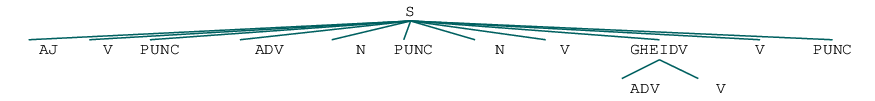

In [113]:
vasf_ext(pos_tagger.tag(comments_tokens['comment'][sent_index][0]))

In [115]:
pos_tagger.tag(comments_tokens['comment'][sent_index][0])

[('عالی', 'AJ'),
 ('بود', 'V'),
 ('،', 'PUNC'),
 ('بخصوص', 'ADV'),
 ('پایانش', 'N'),
 ('،', 'PUNC'),
 ('توصیه', 'N'),
 ('میکنم', 'V'),
 ('حتما', 'ADV'),
 ('ببینید', 'V'),
 ('👌', 'V'),
 ('👌', 'PUNC')]

In [117]:
mosufs = []
gheids = []
for sentence in tqdm(comments_tokens['comment']):
    tree=vasf_ext(pos_tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|███████████████████████████████████████████████████████████████████████████| 84320/84320 [00:10<00:00, 8301.78it/s]


In [118]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
gheid_texts = [' '.join([x[0],y[0]]) for x,y in gheids]

(['فیلم قشنگی',
  '👌 خسته',
  'درخشان زیبا',
  'فیلمهای ایرانی',
  'کارگردانی ماهرانه',
  'حقیقت تلخ',
  'دلم خنک',
  'آدم کثیف',
  'فیلم ایرانی',
  'نقش آفرینی'],
 ['حتما داره',
  'حتما ببینید',
  'حتما ببینید',
  'حتما بیینید',
  'فقط میتونم',
  'زود گذشتید',
  'زودتر بیاد',
  'خیلی خوبه',
  'خیلی خوبه',
  'خیلی منتظرم'])

In [119]:
results = {}
results['mosuf'] = nltk.FreqDist(mosuf_texts).most_common(50)
results['gheid'] = nltk.FreqDist(gheid_texts).most_common(50)
pd.DataFrame(results)

mosuf                 gheid
0      (فیلم عالی, 639)   (حتما ببینید, 1832)
1     (فیلم قشنگی, 530)      (خیلی خوبه, 930)
2      (فیلم خوبی, 473)     (خیلی قشنگه, 779)
3      (دمتون گرم, 185)    (خیلی خندیدم, 146)
4       (فیلم خوب, 144)       (مگه میشه, 142)
5      (فیلم قشنگ, 143)      (حالا دیدم, 141)
6       (فیلم فوق, 127)    (حتما ببینین, 136)
7    (هیجان انگیز, 117)          (چی بگم, 98)
8      (فیلم زیبا, 115)        (هرچی بگم, 87)
9         (خنده 😂, 105)      (فقط میتونم, 69)
10     (باب اسفنجی, 97)      (حتما ببنید, 69)
11     (فیلم جالبی, 95)     (خیلی زیباست, 63)
12    (دوست داشتنی, 88)           (چی شد, 63)
13    (فیلم زیبایی, 87)         (واقعا 👌, 58)
14        (دمت گرم, 84)     (خیلی ممنونم, 54)
15       (روحش شاد, 81)      (هنوز ندیدم, 50)
16     (فیلمش عالی, 71)      (زودتر بیاد, 47)
17    (فیلم ترسناک, 68)         (چی میشه, 46)
18      (وایی عالی, 61)     (واقعا قشنگه, 45)
19  (دختر کفشدوزکی, 60)       (الان دیدم, 45)
20      (دمشون گرم, 58)    (بالاخره اومد, 43)
21     (فیلم عالیه, 56)    (واقعا ممنونم, 43)
22       (روحت شاد, 56)       (حتما ببین, 42)
23        (حس خوبی, 55)    (حتما ببینیدش, 39)
24          (مرد 😭, 55)        (پیش بینی, 39)
25      (فیلم جذاب, 52)       (مگه داریم, 36)
26         (😂 عالی, 50)    (خیلی خوشحالم, 33)
27      (فیلم هندی, 50)  (فوق‌العاده بود, 32)
28     (فیلم جذابی, 48)       (حتما باید, 32)
29    (فیلم باحالی, 47)         (کی میاد, 29)
30       (غم انگیز, 47)         (واقعا 😍, 29)
31    (فیلم بهترین, 46)    (خیلی خندیدیم, 28)
32         (👌 عالی, 40)        (خیلی بده, 27)
33         (😍 عالی, 40)         (واقعا 👏, 26)
34      (نبود عالی, 40)      (خیلی جالبه, 26)
35     (دوبله عالی, 39)     (چقدر خندیدم, 26)
36     (یادش گرامی, 39)          (چی بود, 26)
37    (فیلم ایرانی, 37)          (خیلی 😍, 26)
38     (جزو بهترین, 35)      (حتما ببیند, 24)
39      (فیلم جالب, 35)         (واقعا ❤, 24)
40      (فیلم خوشم, 34)        (پیش دیدم, 24)
41     (نهایت عالی, 33)      (کلی خندیدم, 24)
42    (کارتون عالی, 32)       (فردا میاد, 23)
43         (❤ عالی, 31)      (خیلی بهتره, 23)
44      (سلام عالی, 31)    (فوق‌العاده 👏, 22)
45      (میدان سرخ, 29)      (هرچقدر بگم, 21)
46     (فیلمش قشنگ, 29)         (واقعا 👍, 20)
47        (دلم خنک, 28)          (چی بشه, 18)
48     (سریال خوبی, 28)      (خیلی خوبیه, 18)
49   (فیلیمو ممنون, 28)     (خیلی ترسیدم, 18)

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استخراج کلمات پربسامد مبتنی بر هر فیلم</h2> 

In [120]:
import yake

In [242]:
token_based_movie = {}
movie_names = []
for title, tokens in zip(comments_tokens['title'], comments_tokens['comment']):
    tmp_key = ''
    if len(title.split('|')) < 3:
        tmp_key = title.split('|')[0].replace(' دانلود و تماشای رایگان', '')
    else:
        tmp_key = title.split('|')[0]
    if not tmp_key in movie_names:
        movie_names.append(tmp_key)
    if tmp_key in token_based_movie:
        token_based_movie[tmp_key].extend(tokens)
    else:
        token_based_movie[tmp_key] = tokens

In [244]:
token_based_movie_nonstop = {}
    
for k in tqdm(token_based_movie):
    for sent in token_based_movie[k]:
        for token in sent:
            if not token in stopwords:
                if k in token_based_movie_nonstop:
                    token_based_movie_nonstop[k].append(token)
                else:
                    token_based_movie_nonstop[k] = [token]

100%|█████████████████████████████████████████████████████████████████████████████| 2814/2814 [00:01<00:00, 1524.72it/s]


In [252]:
movie_freq = {}
for k in tqdm(token_based_movie_nonstop):
    if len(token_based_movie_nonstop[k]) > 100:
        movie_freq[k] = nltk.FreqDist(token_based_movie_nonstop[k]).most_common(30)
len(movie_freq)

100%|████████████████████████████████████████████████████████████████████████████| 2814/2814 [00:00<00:00, 18414.09it/s]


806

In [253]:
for movie in random.sample(list(dict.fromkeys(movie_freq)), 20):
    print(f'--------[{movie}]--------')
    for k in movie_freq[movie][:5]:
        print(k)

--------[فیلم دنیای ژوراسیک]--------
('😍', 14)
('👍', 12)
('👏', 9)
('👌', 6)
('😘', 5)
('❤', 4)
('💕', 4)
('واقعا', 4)
('😂', 3)
('😙', 3)
('قشنگ', 3)
('💪', 2)
('ممنونم', 2)
('💋', 2)
('دیدمش', 2)
('❣', 2)
('🤌', 2)
('جالب', 2)
('😚', 2)
('😫', 2)
--------[فیلم تلقین]--------
('👌', 20)
('👍', 13)
('😍', 13)
('واقعا', 9)
('نولان', 7)
('👏', 7)
('❤', 6)
('🤩', 6)
('ذهن', 5)
('دیدم', 5)
('فوق\u200cالعاده', 5)
('🤗', 5)
('🙏', 4)
('کریستوفر', 4)
('حتما', 4)
('گذشته', 4)
('زندگی', 3)
('ب', 3)
('قشنگ', 3)
('میده', 3)
--------[فیلم چشمان تامی فی (The Eyes of Tammy Faye 2021)]--------
('دنیای', 8)
('🤩', 6)
('نهایت', 4)
('محشر', 4)
('❤', 4)
('بازیگراش', 4)
('موضوع', 4)
('فیلماز', 4)
('پولشویی', 4)
('مذهب', 4)
('سیر', 4)
('نشدن', 4)
('چشم', 4)
('انسان', 4)
('عوام', 4)
('فریب', 4)
('خورده', 4)
('انتها', 4)
('باور', 4)
('توئه', 4)
--------[سریال کانون پرستاران بچه]--------
('😍', 25)
('❤', 17)
('👍', 12)
('💖', 7)
('😭', 6)
('واقعا', 6)
('عالیه', 6)
('حتما', 6)
('عاشق', 6)
('💜', 6)
('قشنگه', 5)
('😘', 5)
('خوبه', 4)
(

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استخراج کلمات کلیدی</h2> 

<h2 style="direction:rtl;font-family: 'B Lotus';"> § تحلیل احساسات نسبت به هر فیلم</h2> 

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install torch torchvision torchaudio

In [ ]:
import torch
from transformers import AutoTokenizer, MT5EncoderModel, MT5Tokenizer, MT5ForConditionalGeneration

In [ ]:
model_name = "persiannlp/mt5-small-parsinlu-sentiment-analysis"

In [ ]:
model_encoding = MT5EncoderModel.from_pretrained(model_name)
model_generator = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = MT5Tokenizer.from_pretrained(model_name)

In [ ]:
comment_sentiment = 
for sent in comment_sentiment:
    input_ids = tokenizer(a, return_tensors="pt").input_ids
    output = model_encoding(input_ids)
    hidden_state = output.last_hidden_state
    print(hidden_state)
    res = model_generator.generate(input_ids)
    print(tokenizer.batch_decode(res, skip_special_tokens=True), [a])